In [86]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

cars = pandas.read_csv("automobile.txt")
cars.head(25)
# 205 rows × 26 columns

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [15]:
cars.loc[(cars["engine-location"] != "front") & (cars["engine-location"] != "rear")]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## Data Cleansing

### Identifying redundant and unnecessary columns

No columns need to be removed. Data is not repeated in any of the columns and each column is unique.

### Identifying null values in the columns

In [16]:
cars.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

No null values are present in the dataframe. There are however, a fair number of question marks in a lot of the rows under the "normalized-losses" column that can have a negative effect on analysis of the data.

### Identifying the rows with question marks as opposed to null values in the column

In [17]:
cars.loc[cars["normalized-losses"] == "?"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


Of the 205 rows in the data frame, 41 of the rows have question marks under the "normalized-losses" column. That is a total of 20% of the column missing data that may be used in analysis.

### Converting all empty values to a zero in the "normalized-losses" column

In [18]:
cars.loc[cars["normalized-losses"] == "?", "normalized-losses"] = 0
cars.loc[cars["normalized-losses"] == "?"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


All question marks have been removed from the column.

### Converting the "normalized-losses" column to int64 type 

In [31]:
cars["normalized-losses"].astype(numpy.float64)

0        0.0
1        0.0
2        0.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

# Exploratory Data Analysis

Determining whether the make of the car will affect the various specifics of the car. To provide an example, analysing whether the make of the car affects the length/size of the "stroke". 

In [7]:
cars.loc[cars["make"] == "audi"]
cars.loc[cars["make"] == "alfa-romero"]
cars.loc[cars["make"] == "chevrolet"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


"Stroke" is not a unique feature based on the manufacturer, however, certain manufacturers opt for the same or similar stroke across all their vehicles. Audi appears to favour a strike size/distance of 3.40 across all the Audi vehicles. Alfa Romero is consistent with the size in stroke, however, opted for a different stroke length/distance for a single vehicle. Seemingly due to the vehicle being a hatchback and not a convertible. 

### Identifying the most expensive, on average, vehicle based on the make

Four vehicles in the dataframe do not have a price and will therefore be removed.

In [24]:
no_prices = cars.loc[cars["price"] == "?"]
cars.drop(cars[cars["price"] == "?"].index, inplace = True)
no_prices

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [43]:
cars["price"].astype(numpy.float64)
make_and_price = cars.groupby("make")["price"].mean().sort_values(ascending = False)
make_and_price

make
toyota           1.671448e+136
mazda             3.056241e+76
nissan            3.055394e+76
honda             4.984374e+53
mitsubishi        4.145861e+53
volvo             1.176376e+53
peugot            1.081830e+53
volkswagen        6.479831e+50
subaru            4.265588e+49
mercedes-benz     3.194035e+38
bmw               2.053771e+38
dodge             6.191820e+35
audi              2.325029e+28
saab              1.975020e+28
plymouth          7.961137e+27
porsche           5.504581e+18
jaguar            1.075012e+14
alfa-romero       4.498388e+13
chevrolet         1.717210e+11
isuzu             3.392555e+08
renault           4.647995e+07
mercury           1.650300e+04
Name: price, dtype: float64

The output above reveals that Toyotas are the most expensive vehicles in the dataframe, on average. The assumption that could justify this output is the number of possible Toyota vehicles in the dataframe. The average price could be skewed towards Toyota because the majority of cars in the dataframe are of a Toyota make.

## Identifying the number of Toyota vehicles in the dataframe

In [34]:
cars.loc[cars["make"] == "toyota"].count()[0]

32

In [36]:
cars["count"] = 1
cars.groupby("make")["count"].sum()

make
alfa-romero       3
audi              6
bmw               8
chevrolet         3
dodge             9
honda            13
isuzu             2
jaguar            3
mazda            17
mercedes-benz     8
mercury           1
mitsubishi       13
nissan           18
peugot           11
plymouth          7
porsche           4
renault           2
saab              6
subaru           12
toyota           32
volkswagen       12
volvo            11
Name: count, dtype: int64

The assumption has proven to be correct as Toyota has almost double the number of vehicles with 32 being of a Toyota make with second being Nissan with 18 vehicles.

### Grouping the vehicles by fuel-type, aspiration and body-style

In [42]:
print(cars.groupby("fuel-type").size())
print()
print(cars.groupby("aspiration").size())
print()
print(cars.groupby("body-style").size())

fuel-type
diesel     20
gas       181
dtype: int64

aspiration
std      165
turbo     36
dtype: int64

body-style
convertible     6
hardtop         8
hatchback      68
sedan          94
wagon          25
dtype: int64


Based on the information above, it is clear to see that gas vehicles are manufactured more than diesel vehicles. This may be because gas vehicles are cheaper than diesel vehicles or that sedans tend to be gas vehicles hence the popularity of both sedans and gas vehicles. The same applies to std. std Aspiration appears to be manufactured more than turbo vehicles which would allude to the idea that sedans, generally gas cars, are of an std aspiration as opposed to a turbo aspiration. 

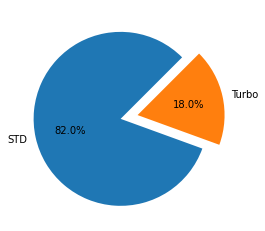

<Figure size 864x432 with 0 Axes>

In [93]:
label = ["STD", "Turbo"]
explode = (0.2, 0)
plt.pie(cars.groupby("aspiration").size(), labels = label, explode = explode, autopct = '%1.1f%%', startangle = 45)
plt.figure(figsize = (12, 6))
plt.show()

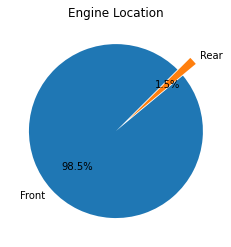

In [69]:
engine = cars.groupby("engine-location").size()
engine

labels = "Front", "Rear"
explode = (0, 0.2)
plt.title("Engine Location")
plt.pie(engine, explode = explode, labels = labels, autopct = '%1.1f%%', startangle = 45)
plt.show()

As revealed above, 98.5% of vehicle manufacturers opt for an engine that is located in front of the vehicle as opposed to the rear of the vehicle.

### Grouping the vehicles based on body-style to identify the most popular

In [72]:
body = cars.groupby("body-style").size()
body

body-style
convertible     6
hardtop         8
hatchback      68
sedan          94
wagon          25
dtype: int64

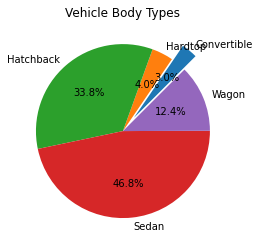

<Figure size 864x576 with 0 Axes>

In [78]:
labels = "Convertible", "Hardtop", "Hatchback", "Sedan", "Wagon"
explode = (0.2, 0, 0, 0, 0)
plt.title("Vehicle Body Types")
plt.pie(body, explode = explode, labels = labels, autopct = '%1.1f%%', startangle = 45)
plt.figure(figsize = (12, 8))
plt.show()

As revealed above, Sedans are the most popular of the body styles of the vehicles within the dataframe.

### Grouping the fuel-system of the various vehicles

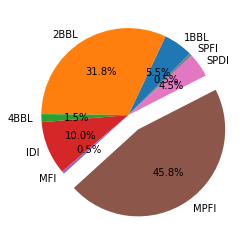

In [79]:
fsystem = cars.groupby("fuel-system").size()
fsystem

labels = "1BBL", "2BBL", "4BBL", "IDI", "MFI", "MPFI", "SPDI", "SPFI"
explode = (0, 0, 0, 0, 0, 0.2, 0, 0)
plt.pie(fsystem, explode = explode, labels = labels, autopct = '%1.1f%%', startangle = 45 )
plt.show()

## Grouping the vehicles based on fuel-type

fuel-type
diesel     20
gas       181
dtype: int64


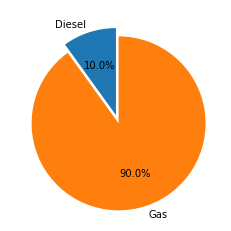

In [82]:
ftype = cars.groupby("fuel-type").size()
print(ftype)

labels = "Diesel", "Gas"
explode = (0, 0.1)
plt.pie(ftype, labels = labels, explode = explode, autopct = "%1.1f%%", startangle = 90)
plt.show()

## Inferences and analysis completed in EDA.docx

In [84]:
cars.groupby("fuel-type")["price"].mean().sort_values(ascending = False)

fuel-type
gas                inf
diesel    5.397592e+91
Name: price, dtype: float64